In [19]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
from matplotlib import rc

# Svona getum við tekkað með utf-8 kóðun í ásamerkingum
#plot.rc('text', usetex=True)
#plot.rc('text.latex', preamble = r'\usepackage[T1]{fontenc}')

# Staðsetning gagnaskráa
#directory = '/home/thg191/Documents/HI/V2019/Verklegt/Leiðniskömmtun'
# Skilgreinum breytur
V0 = 0.1011     # Spenna frá spennugjafa
R = 1000        # Viðnám
Vz = 0          # Skekkja í sveiflusjá
# Vz = -0.7e-3
Iz = Vz/R       # Skekkja í straumi
BW = 8e-7
G0 = 7.7498e-5


# Hjálparforrit til að telja línur í skrá 
def file_len(filename):
    count = 0
    f = open(filename)
    lines = f.readlines()
    for line in lines:
        count = count + 1
    return count

# Hjálparforrit til að telja csv skrár í möppu
def file_num():#directory):
    files = 0
    for filename in os.listdir():#directory):
        if filename.endswith('.csv'):
            files = files + 1
    return files

# Opnum gagnaskrá til að vinna með
filename = "scope_55.csv"
count = file_len(filename) - 2
f = open(filename)
lines = f.readlines()[2:] # Sleppir fyrstu 2 línum í skránni

# Flytjum gögn úr skránni í fylki
t = np.empty([count], dtype = np.double())
VR = np.empty([count], dtype = np.double())
I = np.empty([count], dtype = np.double())
i = 0
for line in lines:
    line.rstrip('\n')
    line = [np.double(i) for i in line.split(',')]
    t[i] = line[0]
    VR[i] = line[1] - Vz
    I[i] = (1/R)*line[1] - Iz
    i = i + 1


'''
# Plottum leiðni sem fall af tíma ásamt væntigildum
G = np.divide(np.divide(VR, R),(V0-VR))

#fig2, bx = plot.subplots()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))
plt.plot(t, np.divide(G,G0))
plt.ylabel('Leiðni [2e^2/h]')
plt.xlabel('Tími [s]')
plot.ylim(0,20)
plt.plot([min(t), max(t)], [1, 1], c='grey', label='Skömmtun')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
for n in range(2,12):
    plt.plot([min(t), max(t)], [n, n], c='grey')
plt.legend()
plt.savefig('scope_4-tC.png')
plt.show()
'''

# Sameinum öll mæligögnin í eitt fylki
totcount = count*file_num()#directory)
TOT = np.empty([totcount], dtype = np.double)
c = 0
for filename in os.listdir():#directory):
    if filename.endswith('.csv'):
        scope = open(filename)
        scopelines = scope.readlines()[2:]
        for line in scopelines:
            line.rstrip('\n')
            line = [np.double(i) for i in line.split(',')]
            TOT[c] = line[1]
            c = c + 1
# Munum að draga Vz frá gildunum
TOT = TOT - Vz




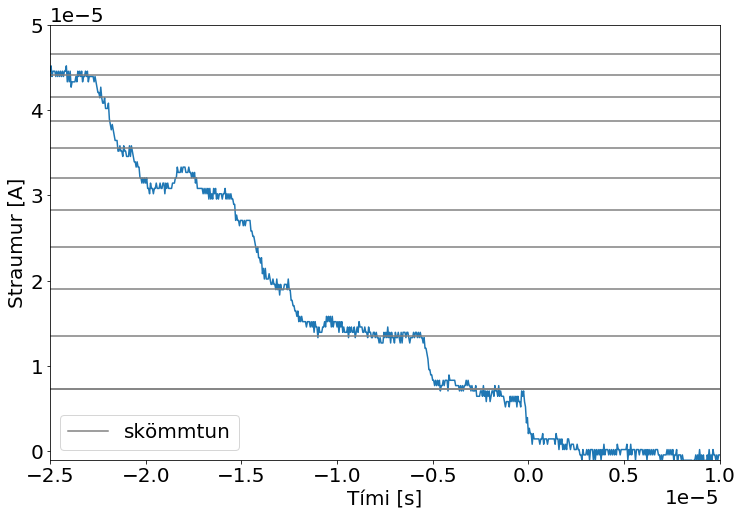

In [20]:
# Plottum straum sem fall af tíma ásamt væntigildum
#fig1, ax = plot.subplots()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))
plt.plot(t, I)
plt.xlabel('Tími [s]')
plt.ylabel('Straumur [A]')
In = (V0)/(R + (12.9e3/1))
plt.plot([min(t), max(t)], [In, In],c='grey',label='skömmtun')

for n in range(1,12):
#    I = (V0/R)/(1 + (12.9e3/R)/n)
#    I = (V0)/(1 + (12.9e3/R)/n)
    In = (V0)/(R + (12.9e3/n))
    plt.plot([min(t), max(t)], [In, In],c='grey')
plt.xlim(-0.000025,0.00001)
plt.ylim(-0.000001,0.00005)
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('kopar-straumur.png')
plt.show()

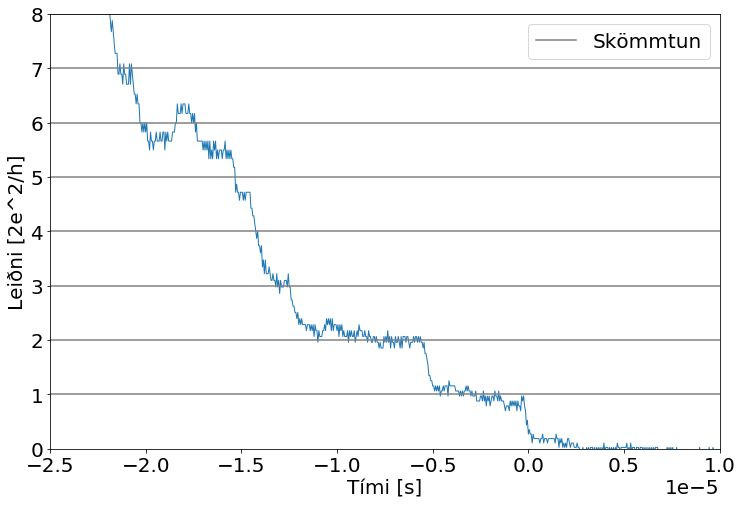

In [21]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))
G = np.divide(np.divide(VR, R),(V0-VR))
plt.plot(t, np.divide(G,G0), Linewidth = 1)
plt.ylabel('Leiðni [2e^2/h]')
plt.xlabel('Tími [s]')
plt.plot([min(t), max(t)], [1, 1], c='grey', label='Skömmtun')
for n in range(2,24):
    plt.plot([min(t), max(t)], [n, n], c='grey')
plt.xlim(-0.000025,0.00001)
plt.ylim(0,8)
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('kopar-leidni.png')
plt.show()


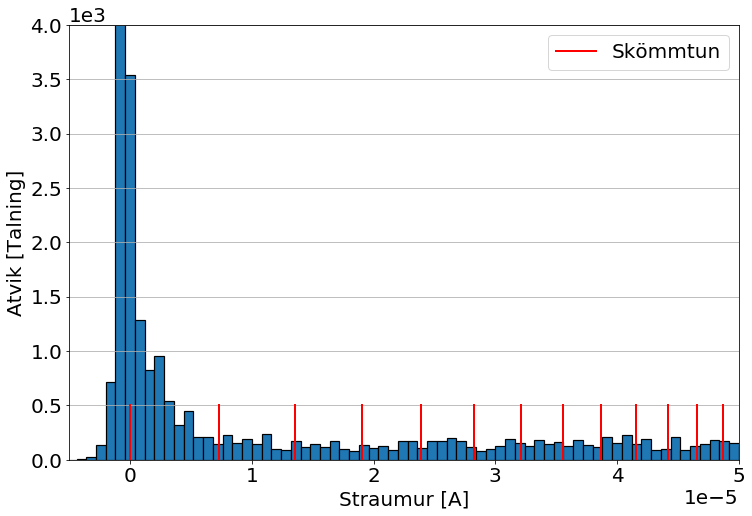

In [22]:
# Plottum stuðlarit af straumi ásamt væntigildum
#fig3, cx = plot.subplots()
data1 = np.divide(TOT,R)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))
plt.hist(data1, np.arange(-1e-5, 1e-4 + BW, BW), edgecolor='black', linewidth=1.2)

for n in range(1,24):
    I = (V0/R)/(1 + (12.9e3/R)/n)
    plt.plot([I,I],[0,500], Linewidth = 2, c='r')
plt.plot([0,0], [0,500], Linewidth = 2, c='r', label='Skömmtun')
plt.legend()

plt.xlim([-0.5e-5, 5e-5])
plt.ylim(0,4000)
plt.xlabel('Straumur [A]')
plt.ylabel('Atvik [Talning]')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.grid(True)
plt.savefig('kopar-hist-straumur.png')
plt.show()


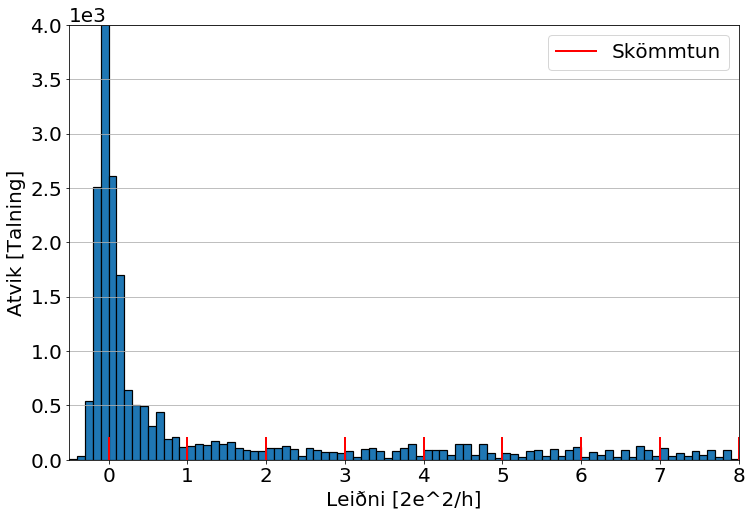

In [23]:
# Plottum stuðlarit af leiðni ásamt væntigildum
TOT_G = np.divide(np.divide(TOT,R), (V0 - TOT))

data2 = np.divide(TOT_G, G0)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))

plt.hist(data2, np.arange(-1, 12 + 0.1, 0.1), edgecolor='black', linewidth=1.2)
plt.xlabel('Leiðni [2e^2/h]')
plt.ylabel('Atvik [Talning]')
plt.xlim(-0.5, 8)
plt.plot([0, 0], [0, 200], Linewidth = 2,c='red',label='Skömmtun') 
for n in range(1,24):
    plt.plot([n, n], [0, 200], Linewidth = 2,c='red') 
plt.legend()

plt.ylim(0,4000)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.grid(True)
plt.savefig('kopar-hist-leidni.png')
plt.show()
